# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Проект по проверки гипотизы в Python о читательской способности пользователей из Москвы и Санкт-Петербурга.

- Автор: Калинина Ольга Владимировна

## Цели и задачи проекта

<font>В данном проекте необходимо проанализировать активность пользователей  из Москвы и Санкт-Петербурга. А также, определить где пользователи проводят в среднем больше времени за чтением и прослушиванием книг в приложении.

Необходимо решить ряд задач:
 - Проверить наличие дубликатов в идентификаторах пользователей.
 - Сравнить размеры групп, их статистики и распределение.
 - Необходимо, используя одностороннюю проверку гипотезы с двумя выборками проверить, что:
        - Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.
        - Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

 - По результатам анализа данных, необходимо подготовить аналитическую записку, которая должна включать в себя:
        - Выбранный тип t-теста и уровень статистической значимости.
        - Результат теста, или p-value.
        - Вывод на основе полученного p-value, то есть интерпретацию результатов.</font>

## Описание данных

    Таблицы этого проекта содержат данные о чтении и прослушивании контента в сервисе Яндекс Книги, которые включают информацию о пользователях, городе, длительности сессий. 
    
    https://code.s3.yandex.net/datasets/yandex_knigi_data.csv — таблица данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания).
    Структура файла:
       Unnamed: 0 - индекс от 0 до 8784; 
       puid — идентификатор пользователя;
       hours — длительность чтения или прослушивания в часах;
       city — город пользователя;
    
    https://code.s3.yandex.net/datasets/ab_test_participants.csv — таблица участников тестов.
    Структура файла:
        user_id — идентификатор пользователя;
        group — группа пользователя;
        ab_test — название теста;
        device — устройство, с которого происходила регистрация.
        
    https://code.s3.yandex.net/datasets/ab_test_events.zip — архив с одним csv-файлом, в котором собраны события 2020 года;
    Структура файла:
        user_id — идентификатор пользователя;
        event_dt — дата и время события;
        event_name — тип события;
        details — дополнительные данные о событии.
    
    Дополнительная информация по столбцу `details`
    Числовые значения:
    registration (регистрация) — стоимость привлечения клиента;
    purchase (покупка) — стоимость покупки.

## Содержимое проекта

    1  Проект по проверки гипотизы в Python о читательской способности пользователей из Москвы и Санкт-Петербурга.
    2  Цели и задачи проекта
    3  Описание данных
    4  Содержимое проекта
    5  1. Загрузка данных и знакомство с ними

        5.1  Загрузка данных .
        5.2  Знакомство с данными.
        5.3  Проверка на дубликаты.

    6  2. Проверка гипотезы в Python

        6.1  Сравнить размеры групп, их статистики и распределение.

    7  3. Аналитическая записка
    8  1. Опишите цели исследования.
    9  2. Загрузите данные, оцените их целостность.

        9.1  Анализ датафрейма participants:
        9.2  Анализ датафрейма events:

    10  3. По таблице ab_test_participants оцените корректность проведения теста:
    11  4. Проведите оценку результатов A/B-тестирования:

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

### Загрузка данных .

In [1]:
#Установить библиотеку с именем matplotlib-venn:
!pip install matplotlib-venn

     |████████████████████████████████| 40 kB 5.4 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45389 sha256=8f90adf426d4ceb9f91b6269788c338f0ffb26c05cf40d108ba4b30b48e4fbe3
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


In [2]:
# Загружаем библиотеки для визуализации данных:
import matplotlib.pyplot as plt

In [ ]:
# Импортируем библиотеки:
import pandas as pd
import numpy as np

In [ ]:
# Выгружаем данные в переменную yandex_knigi_data:
yandex_knigi_data = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv') 

### Знакомство с данными.

In [ ]:
# Выведем основную информацию по датафрейму:
yandex_knigi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [ ]:
# Выведем на экран первые пять строк полученного датафрейма:
yandex_knigi_data.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [ ]:
# Выведем уникальные значения в столбце 'city':
yandex_knigi_data['city'].unique()

array(['Москва', 'Санкт-Петербург'], dtype=object)

In [ ]:
# Метод describe(). 
# Он показывает среднее со стандартным отклонением, максимальные, минимальные значения переменных
#и их разделение по квантилям:
yandex_knigi_data.describe()

,Unnamed: 0,puid,hours
count,8784.000000,8.784000e+03,8784.000000
mean,4391.500000,1.029234e+13,11.087670
std,2535.866716,1.073532e+14,37.701350
min,0.000000,9.668000e+03,0.000018
25%,2195.750000,3.239271e+08,0.066246
50%,4391.500000,8.828218e+08,0.942344
75%,6587.250000,1.516464e+09,6.065151
max,8783.000000,1.130000e+15,978.764775


Датафрейм "yandex_knigi" состоит из 4 столбцов и 8784 строк, пропущенные строчки отсутствуют. В датафрейме три типа данных - float64(1), int64(2), object(1). В датафрейме отсутствуют пропущенные значения.

### Проверка на дубликаты.

In [ ]:
# Проверим наличие дубликатов в идентификаторах пользователей.
# Количество дубликатов:
duplicate_rows = yandex_knigi_data['puid'].duplicated(keep='last').sum()

# Вывод результатов:
print(duplicate_rows)

244


In [ ]:
# Необходимо удалить дубликаты, обнаруженных при анализе:
yandex_knigi_data = yandex_knigi_data.drop_duplicates(subset=['puid'])

In [ ]:
# Проверим корректность проведённой операции.
# Количество дубликатов:
duplicate_rows = yandex_knigi_data['puid'].duplicated(keep='last').sum()

# Вывод результатов:
print(duplicate_rows)

0


In [ ]:
# Столбец "Unnamed: 0" не имеет практической значимости, так как в нём хранятся номера строк, дублирующие индексы.
#Принято решение об удалении данного столбца:
del yandex_knigi_data['Unnamed: 0']

In [ ]:
# Выведем основную информацию по итоговому датафрейму:
yandex_knigi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8540 non-null   object 
 1   puid    8540 non-null   int64  
 2   hours   8540 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.9+ KB


In [ ]:
#Подсчет количества пользователей в каждом городе:
users_by_city_count = yandex_knigi_data['city'].value_counts().sort_values(ascending=False)

#Выводим результат на экран
print(users_by_city_count)

Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64


In [ ]:
# Подсчитаем сколько в среднем часов чтения и прослушивания в каждом из городов:
group = yandex_knigi_data.groupby('city')['hours'].mean()
print(group)

city
Москва             10.881092
Санкт-Петербург    11.264433
Name: hours, dtype: float64


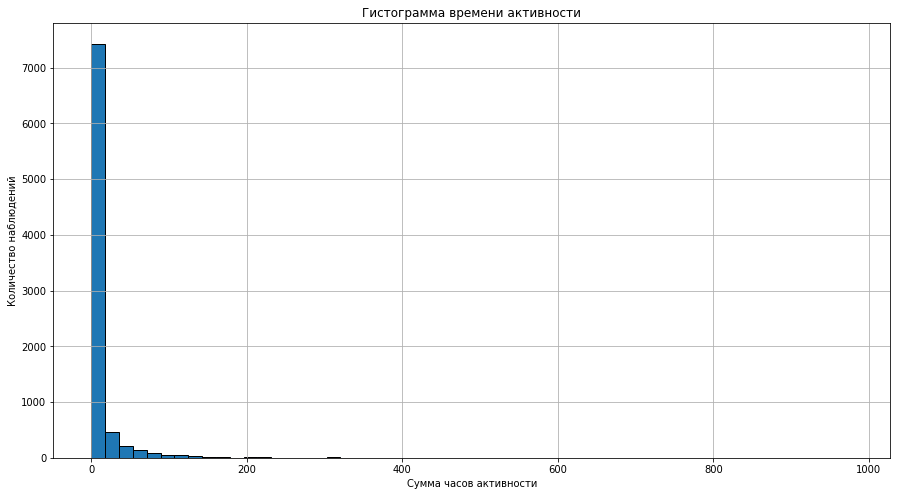

In [ ]:
# Построим гистограмму распределения 
yandex_knigi_data['hours'].hist(bins=55, 
                        figsize=(15, 8),
                        edgecolor='black')
# Установка заголовка и подписей
plt.title('Гистограмма времени активности')
plt.xlabel('Сумма часов активности')
plt.ylabel('Количество наблюдений')

# Отображение гистограммы
plt.show()

Датафрейм "yandex_knigi" состоит из 3 столбцов и 8540 строк, пропущенные строчки отсутствуют. В датафрейме три типа данных - float64(1), int64(1), object(1). В датафрейме отсутствуют пропущенные значения.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [ ]:
# Загружаем библиотеку для теста:
from scipy.stats import mannwhitneyu

In [ ]:
# Определим длинну каждой выборки:
a = yandex_knigi_data[yandex_knigi_data['city'] == 'Москва']['hours']
b = yandex_knigi_data[yandex_knigi_data['city'] == 'Санкт-Петербург']['hours']

a.shape[0], b.shape[0]

(6234, 2306)

Для проверки гипотезы используется тест Манна — Уитни, так как размеры выборки значительно отличаются друг от друга, этот тест подойдёт для их анализа.

In [ ]:
# Определяем данные в переменные для каждого города:
a = yandex_knigi_data[yandex_knigi_data['city'] == 'Москва']['hours'] # время активности пользователей в Москве
b = yandex_knigi_data[yandex_knigi_data['city'] == 'Санкт-Петербург']['hours'] # время активности пользователей в Санкт-Петербурге

# Приминяем тест Манна — Уитни:
alpha = 0.05
mw_test = mannwhitneyu(
    b,
    a,
    alternative='greater'
)

# Сравниваем результат теста с уровнем значимости:
if mw_test.pvalue > alpha:
    print(f'p_value={round(mw_test.pvalue, 2)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны')
else:
    print(f'p_value={round(mw_test.pvalue, 2)} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах A и B различаются')
print(round(mw_test.pvalue, 2))

p_value=0.62 > 0.05
Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны
0.62


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Для проверки гипотезы используется тест Манна — Уитни, так как размеры выборки значительно отличаются друг от друга, этот тест подойдёт для их анализа. Также, благодаря тому, что тест Манна — Уитни нечувствителен к выбросам, его можно применять к любым числовым данным.
- Полученное значение p_value=0.62.

- Так как p-value оказалось больше уровня значимости, то можно сделать выводы, что средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Возможно, отсутствие значимой разницы во времени активности пользователей связано с тем, что сравнивается активность действий в приложении. Так как пользоваться им возможно в любом месте и в любое время, то географическое место и часовой пояс не влияют на активность пользователей.
- Москва и Санкт-Петербург города миллионники, туристически значемы, в обоих городах активно живут и общаются миллионы людей. В обоих городах активно развивается культура чтения и саморазвития. Это влияет на активность пользователей в обоих городах.
- Оба города активно коммуницируют друг с другомм, их близкое расположение и общая история также влияет на предпочения и культуру жизни жителей.

----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Цель исследования заключается в анализе A/B-теста. Необходимо изучить данные и определить повлияло ли изминение в интерфейсе сайта на количество пользователей, совершивших покупку.

## 2. Загрузите данные, оцените их целостность.


In [ ]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

### Анализ датафрейма participants:

In [ ]:
# Выведем первые пять строк датафрейма participants:
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [ ]:
# Выведем информацию о датафрейме participants:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [ ]:
# Выведем уникальные значения в столбце:
participants['ab_test'].unique()

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

In [ ]:
# Выведем уникальные значения в столбце:
participants['group'].unique()

array(['B', 'A'], dtype=object)

In [ ]:
# Выведем уникальные значения в столбце:
participants['device'].unique()

array(['Mac', 'Android', 'iPhone', 'PC'], dtype=object)

In [ ]:
#Проведём анализ данных на пропуски и дубликаты:
#Количество пропусков
missing_values = participants.isnull().sum().sum()

# Количество дубликатов
duplicate_rows = participants.duplicated(keep='last').sum()

# Вывод результатов
print(f'Количество пропусков: {missing_values}\nКоличество дубликатов: {duplicate_rows}')

Количество пропусков: 0
Количество дубликатов: 0


In [ ]:
# Проверка на тип данных:
print(participants.dtypes)

user_id    object
group      object
ab_test    object
device     object
dtype: object


In [ ]:
user = participants['user_id'].duplicated(keep='last').sum()
user

887

In [ ]:
# Необходимо удалить дубликаты, обнаруженных при анализе:
participants = participants.drop_duplicates(subset=['user_id'])

In [ ]:
# Выведем информацию о датафрейме participants:
participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13638 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13638 non-null  object
 1   group    13638 non-null  object
 2   ab_test  13638 non-null  object
 3   device   13638 non-null  object
dtypes: object(4)
memory usage: 532.7+ KB


Датафрейм "participants" состоит из 4 столбцов и 13638 строк, пропущенные строчки отсутствуют. В датафрейме два типа данных - object(4). В датафрейме отсутствуют пропуски и дубликаты.

### Анализ датафрейма events:

In [ ]:
# Выведем первые пять строк датафрейма participants:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [ ]:
# Выведем информацию о датафрейме participants:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [ ]:
# Расчитаем количество уникальных индифекаторов пользователей:
events['user_id'].nunique()

144184

In [ ]:
# Выведем уникальные значения в столбце:
events['event_name'].unique()

array(['End of Black Friday Ads Campaign', 'registration', 'product_page',
       'login', 'product_cart', 'purchase',
       'Start of Christmas&New Year Promo',
       'Start of CIS New Year Gift Lottery'], dtype=object)

In [ ]:
# Выведем уникальные значения в столбце:
events['details'].nunique()

169

In [ ]:
# Расчитаем количество уникальных индифекаторов пользователей:
even = events.groupby(['event_name'])['user_id'].nunique()
even

event_name
End of Black Friday Ads Campaign           1
Start of CIS New Year Gift Lottery         1
Start of Christmas&New Year Promo          1
login                                 112279
product_cart                           44650
product_page                           81163
purchase                               44759
registration                          144183
Name: user_id, dtype: int64

In [ ]:
#Проведём анализ данных на пропуски и дубликаты:
#Количество пропусков
missing_values = events.isnull().sum().sum()

# Количество дубликатов
duplicate_rows = events.duplicated(keep='last').sum()

# Вывод результатов
print(f'Количество пропусков: {missing_values}\nКоличество дубликатов: {duplicate_rows}')

Количество пропусков: 538264
Количество дубликатов: 36318


In [ ]:
# Проверка на тип данных:
print(events.dtypes)

user_id               object
event_dt      datetime64[ns]
event_name            object
details               object
dtype: object


Датафрейм "events" состоит из 4 столбцов и 787286 строк, Количество пропусков - 538264, количество дубликатов - 36318. В датафрейме два типа данных - int64(4), object(7). В датафрейме отсутствуют пропуски. Пропуски решено оставить, так как их заполнение не омеет практической значимости для дальнейшего анализа теста.

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

Вспомним техническое задание проведённого теста:
Упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

In [ ]:
# Проведём фильтрацию данных: 
part = participants[participants['ab_test']=='interface_eu_test']

In [ ]:
# Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп:
group_a_count = part[part['group'] == 'A']['user_id'].nunique()
group_bcount = part[part['group'] == 'B']['user_id'].nunique()
print(f'Количество уникальных пользователей в группе А: {group_a_count}\nКоличество уникальных пользователей в группе В: {group_bcount}')

Количество уникальных пользователей в группе А: 5174
Количество уникальных пользователей в группе В: 5229


In [ ]:
# Рассчитаем и выведем на экран процентную разницу в количестве пользователей в группах A и B:
group_a_pr = 100 * part[part['group'] == 'A']['user_id'].nunique() / part['user_id'].nunique()
group_b_pr = 100 * part[part['group'] == 'B']['user_id'].nunique()/ part['user_id'].nunique()
print(f'Процентное отношение в группе А: {round(group_a_pr, 2)}%\nПроцентное отношение в группе В: {round(group_b_pr,2)}%')

Процентное отношение в группе А: 49.74%
Процентное отношение в группе В: 50.26%


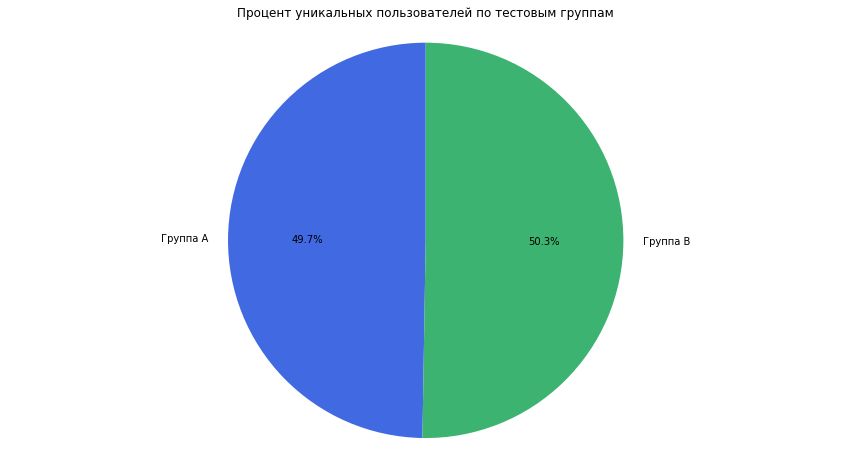

In [ ]:
# Данные для круговой диаграммы:
sizes = [group_a_pr, group_b_pr]
labels = ['Группа A', 'Группа B']
colors = ['royalblue','mediumseagreen']  # Добавьте цвета по вашему усмотрению

# Создаём круговую диаграмму:
plt.figure(figsize=(15, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Чтобы круг был кругом
plt.title('Процент уникальных пользователей по тестовым группам')
plt.show()

In [ ]:
# Расчёт процентной разницы:
P = 100*((group_b_pr - group_a_pr)/group_a_pr)
print(f'Процентная разница:{round(P,2)}%')

Процентная разница:1.06%


In [ ]:
# Проверим, возможно, есть ли пользователи, которые могли попасть в обе группы:
a_group = part[part['group'] == 'A']['user_id']
b_group = part[part['group'] == 'B']['user_id']

intersection = list(set(a_group) & set(b_group))
print(intersection)

[]


    Количество уникальных пользователей в группе А: 5174
    Количество уникальных пользователей в группе В: 5229
    Процентное отношение в группе А: 49.74%
    Процентное отношение в группе В: 50.26%
    Процентная разница:1.06%
    По данным расчётов, никто из пользователей не попал в обе группы одновременно.

Можно судить о независимости тестовых групп.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

 Для того чтобы изучить данные пользователей из групп тестирования, необходимо объеденить датафреймы по индификатору пользователя:

In [ ]:
# Объединяем 2 датафрейма по ключу user_id:
df = pd.merge(events, participants, on='user_id', how='outer')

In [ ]:
# Оставим только события, связанные с участвующими в изучаемом тесте пользователями:
df = df[df['ab_test']=='interface_eu_test']

In [ ]:
# Проверим количество уникальных пользователей в каждой из экспериментальных групп:
group_a_count = df[df['group'] == 'A']['user_id'].nunique()
group_bcount = df[df['group'] == 'B']['user_id'].nunique()
print(f'Количество уникальных пользователей в группе А: {group_a_count}\nКоличество уникальных пользователей в группе В: {group_bcount}')

Количество уникальных пользователей в группе А: 5174
Количество уникальных пользователей в группе В: 5229


Количество пользователей совпадает с ранее расчитанным количеством по таблице participants.

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [ ]:
# Преобразуем дату и время в столбце event_dt в формат datetime:
df['event_dt'] = pd.to_datetime(df['event_dt'])

In [ ]:
# Получаем дату регистрации, которая является первой записью с событием "registration":
registration_date = df.loc[df['event_name'] == 'registration', 'event_dt'].values[0]

# Определяем конечную дату, добавляя 7 дней к дате регистрации:
end_date = registration_date + pd.Timedelta(days=7)

# Фильтруем события, которые произошли после регистрации и до конечной даты (включительно):
filtered_events = df[(df['event_dt'] > registration_date) & (df['event_dt'] <= end_date)]

# Выводим отфильтрованный датафрейм на экран:
print(filtered_events['event_dt'].sort_values(ascending=True))

112850   2020-12-06 14:37:25
114279   2020-12-06 17:20:22
115359   2020-12-06 19:36:54
115436   2020-12-06 19:42:20
116463   2020-12-06 21:34:19
                 ...        
373439   2020-12-13 14:07:06
341836   2020-12-13 14:07:44
373536   2020-12-13 14:07:58
373615   2020-12-13 14:08:46
373537   2020-12-13 14:09:24
Name: event_dt, Length: 19394, dtype: datetime64[ns]


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [ ]:
import statsmodels.api as sm

# Параметры A/B-теста:
baseline_conversion_rate = 0.3  # базовый показатель конверсии
effect_size = 0.05  # ожидаемое изменение конверсии
power = 0.8  # мощность теста
alpha = 0.05  # уровень значимости(достоверность теста — 95%)

# Рассчитываем необходимый размер выборки на две группы:
def calculate_sample_size(baseline, effect, alpha, power):
    p1 = baseline
    p2 = baseline + effect
    
    # расчет необходимого размера выборки
    size = sm.stats.proportion_effectsize(p1, p2)
    
    n = sm.stats.NormalIndPower().solve_power(
        effect_size=size,
        alpha=alpha,
        power=power,
        alternative='two-sided'
    )
    return np.ceil(n)

sample_size_per_group = calculate_sample_size(baseline_conversion_rate, effect_size, alpha, power)
total_sample_size = sample_size_per_group * 2

print(f"Необходимый размер выборки для каждой группы: {int(sample_size_per_group)}")
print(f"Общий необходимый размер выборки (две группы): {int(total_sample_size)}")

Необходимый размер выборки для каждой группы: 1376
Общий необходимый размер выборки (две группы): 2752


- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [ ]:
# Проверим распределение пользователей в каждой группе по типу устройства:
filtered_events['device'].unique()

array(['iPhone', 'Android', 'PC', 'Mac'], dtype=object)

In [ ]:
#Доля каждого типа устройства для пользователей из группы A:
A_device_counts = filtered_events[filtered_events['group']=='A']
A_device_counts = A_device_counts.groupby('device')['user_id'].nunique()
A_device_share = A_device_counts/filtered_events['user_id'].nunique()

In [ ]:
#Доля каждого типа устройства для пользователей из группы B:
B_device_counts = filtered_events[filtered_events['group']=='B']
B_device_counts = B_device_counts.groupby('device')['user_id'].nunique()
B_device_share = B_device_counts/filtered_events['user_id'].nunique()

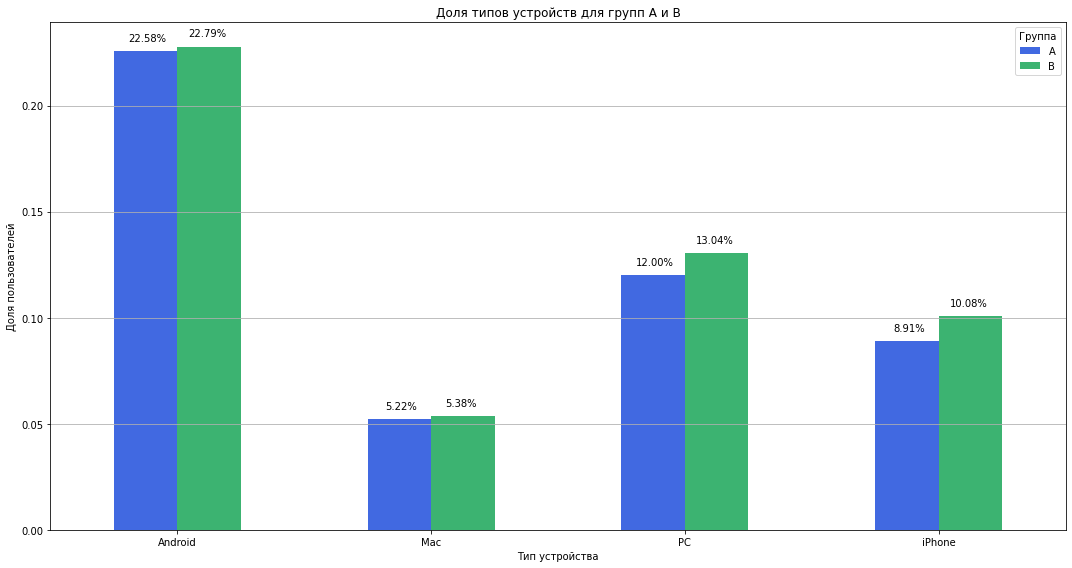

In [ ]:
# Создаем датафреймы для долей:
share_df = pd.DataFrame({
                        'A': A_device_share,
                        'B': B_device_share
                        }).fillna(0)  # Заполним NaN нулями, если типов устройств не оказалось в группе


# Построим диаграммы:
share_df.plot(kind='bar', figsize=(15, 8), color=['royalblue','mediumseagreen'])

# Подписываем графики:
plt.title('Доля типов устройств для групп A и B')
plt.xlabel('Тип устройства')
plt.ylabel('Доля пользователей')
plt.xticks(rotation=0) # Наклон подписей на оси Х
plt.legend(title='Группа', loc='upper right') # Подписи на легенде
plt.grid(axis='y')

# Подписываем значения для группы A:
for i, txt in enumerate(A_device_share):
    # Получаем координаты для подписей:
    plt.annotate(f'{txt:.2%}', (i, txt), textcoords="offset points", xytext=(-30, 10), ha='center')

# Подписываем значения для группы B:
for i, txt in enumerate(B_device_share):
    # Получаем координаты для подписей:
    plt.annotate(f'{txt:.2%}', (i, txt), textcoords="offset points", xytext=(30, 10), ha='center')
    
plt.tight_layout()
plt.show()

По результатам расчёта видно, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства. Максимальная доля пользователей( более 0.2) состоят в группе с типом устройства - Android(В группе "А"- 22,58%, в группе "В" - 22,79% ). Минимальная доля пользователей(чуть более 0.05) состоит в группе с типом устройства - Mac(В группе "А"- 5,22%, в группе "В" - 5,38% ). Процентная разница между экспериментальными группами лежит в допустимых пределах.

In [ ]:
# Рассчитаем для каждой группы количество посетителей, сделавших покупку:
a_purchase = filtered_events[(filtered_events['event_name'] == 'purchase')&(filtered_events['group'] == 'A')]['user_id'].nunique()
b_purchase = filtered_events[(filtered_events['event_name'] == 'purchase')&(filtered_events['group'] == 'B')]['user_id'].nunique()

print(f'Количество посетителей, сделавших покупку в группе А: {a_purchase}\nКоличество посетителей, сделавших покупку в группе В: {b_purchase}')

Количество посетителей, сделавших покупку в группе А: 265
Количество посетителей, сделавших покупку в группе В: 269


In [ ]:
# Рассчитаем для каждой группы общее количество посетителей:
a_count = filtered_events[filtered_events['group']=='A']['user_id'].nunique()
b_count = filtered_events[filtered_events['group']=='B']['user_id'].nunique()

print(f'Общее количество посетителей в группе А: {a_count}\nОбщее количество посетителей в группе В: {b_count}')

Общее количество посетителей в группе А: 1875
Общее количество посетителей в группе В: 1974


In [ ]:
# Определим долю пользователей, совершивших покупку для каждой из групп:
share_a = 100*a_purchase/a_count
share_b = 100*b_purchase/b_count

print(f'Доля посетителей, сделавших покупку в группе А: {round(share_a, 2)}%\nДоля посетителей, сделавших покупку в группе В: {round(share_b, 2)}%')

Доля посетителей, сделавших покупку в группе А: 14.13%
Доля посетителей, сделавших покупку в группе В: 13.63%


In [ ]:
n_a, n_b = a_count, b_count ## размеры выборок A и B
m_a = a_purchase # количество успехов (регистраций) в группе A
m_b = b_purchase # количество успехов (регистраций) в группе B


p_a, p_b = m_a/n_a, m_b/n_b # рассчитываем доли успехов для каждой группы: A и B

print(f'n_a={n_a}, n_b={n_b}')
# 1875 1974

print(f'm_a={m_a}, m_b={m_b}')
# 265 269

print(f'p_a={round(p_a, 2)}, p_b={round(p_b, 2)}')
# 0.14 0.136

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')


n_a=1875, n_b=1974
m_a=265, m_b=269
p_a=0.14, p_b=0.14
Предпосылка о достаточном количестве данных выполняется!


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

По результатам расчёта видно, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства. Максимальная доля пользователей( более 0.2) состоят в группе с типом устройства - Android(В группе "А"- 22,58%, в группе "В" - 22,79% ). Минимальная доля пользователей(чуть более 0.05) состоит в группе с типом устройства - Mac(В группе "А"- 5,22%, в группе "В" - 5,38% ). Процентная разница между экспериментальными группами лежит в допустимых пределах.

Количество уникальных пользователей в группе А: 5174
Количество уникальных пользователей в группе В: 5229
Процентное отношение в группе А: 49.74%
Процентное отношение в группе В: 50.26%
Процентная разница:1.06%
По данным расчётов, никто из пользователей не попал в обе группы одновременно.

Можно судить о независимости тестовых групп.

Необходимый размер выборки для каждой группы: 1376
Общий необходимый размер выборки (две группы): 2752

Общее количество посетителей в группе А: 1875
Общее количество посетителей в группе В: 1974

Количество посетителей, сделавших покупку в группе А: 265
Количество посетителей, сделавших покупку в группе В: 269

n_a=1875, n_b=1974
m_a=265, m_b=269
p_a=0.14, p_b=0.14
Предпосылка о достаточном количестве данных выполняется!

По результатам расчётов доля посетителей, сделавших покупку в группе А - 14.13% и в группе В - 13.63%. Различие составило около 0.5%, что не является статистически значимым. К тому же, показатель немного ухудшился, что опровергает предположение о тои, что разработанная новая версия сайта повысит количество пользователей, которые совершат покупку.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 ## установите уровень значимости

stat_ztest, p_value_ztest = proportions_ztest( # проведите Z-тест пропорций
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller'
)

print(f'pvalue={round(p_value_ztest, 2)}') # выведите полученное p-value 

if p_value_ztest > alpha:
    print('Нулевая гипотеза находит подтверждение!')
else:
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.68
Нулевая гипотеза находит подтверждение!


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

По результатам расчётов доля посетителей, сделавших покупку, в группе А: 14.13% , а в группе В: 13.63%. Расчитанное значение
p_value=0.68, что больше уровня значимости - из-за чего нулевая гипотиза находит подтверждение. Изменение конверсии не выросло, что опровергает предположение о тои, что разработанная новая версия сайта повысит количество пользователей, которые совершат покупку.